In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import hashlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv("/Users/alexprascak/Downloads/USvideos.csv")

In [4]:
data = df.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40379 non-null object
trending_date             40379 non-null object
title                     40379 non-null object
channel_title             40379 non-null object
category_id               40379 non-null int64
publish_time              40379 non-null object
tags                      40379 non-null object
views                     40379 non-null int64
likes                     40379 non-null int64
dislikes                  40379 non-null int64
comment_count             40379 non-null int64
thumbnail_link            40379 non-null object
comments_disabled         40379 non-null bool
ratings_disabled          40379 non-null bool
video_error_or_removed    40379 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.4+ MB


In [7]:
preprocessed_data = data.drop(['description', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'publish_time', 'channel_title', 'trending_date', 'video_id', 'tags', 'title'], axis=1)
preprocessed_data.head()
text_data = data.drop(['views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed','video_id', 'publish_time'], axis=1)

In [8]:
X = preprocessed_data.drop('category_id', axis=1)
y = preprocessed_data['category_id']

In [11]:
arr2d_words = getWords('title',text_data)
orr2d_words = getWords('tags', text_data)

In [12]:
X['modified_title'] = arr2d_words
X['modified_tags'] = orr2d_words

In [13]:
le = LabelEncoder()
le.fit(X['modified_title'])
X['labeled_title'] = le.transform(X['modified_title'])
oc = LabelEncoder()
oc.fit(X['modified_tags'])
X['labeled_tags'] = oc.transform(X['modified_tags'])

In [14]:
X = X.drop('modified_title', axis=1)
X = X.drop('modified_tags', axis=1)

In [219]:
# text_features = X.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1)
# X = X.drop(['labeled_title', 'labeled_tags'], axis=1)

In [15]:
import time

In [16]:
X

,views,likes,dislikes,comment_count,labeled_title,labeled_tags
0,748374,57527,2966,15954,5827,2014
1,2418783,97185,6146,12703,5655,4328
2,3191434,146033,5339,8181,4522,5057
3,343168,10172,666,2146,4075,5156
4,2095731,132235,1989,17518,1520,5228
5,119180,9763,511,1434,193,3993
6,2103417,15993,2445,1970,4691,2016
7,817732,23663,778,3432,296,97
8,826059,3543,119,340,2436,2447
9,256426,12654,1363,2368,6262,5831


In [10]:
def getWords(col:str, data_notNull):
    common_words = set(stopwords.words('english'))
    tagsArray = text_data[col]
    tag2D = []
    tagsArray
    
    for (i,tag) in enumerate(tagsArray):
        lineArray = tag.split('|')
        words = []
        for sentence in lineArray:
            words = words + re.split(r'\W+', sentence.strip())
           
        tag2D.append(words)
        
    for i in range(len(tag2D)):
        temp = [u for u in tag2D[i] if u.lower() not in common_words] 
        temp = " ".join(str(x) for x in temp)
        tag2D[i] = temp
                
    return tag2D

def roc_scores(y_test, y_score, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

def histogram_feature(feature):
    fig, ax = plt.subplots()
    plt.hist(data[feature])
    plt.xlabel(feature)
    plt.ylabel('No. of Videos')

def histogram_log_feature(feature):
    fig, ax = plt.subplots()
    plt.hist(data[feature], log=True)
    plt.xlabel(feature)
    plt.ylabel('Log(No. of Videos)')

def bivariate_scatterplot(feature1, feature2):
    fig, ax = plt.subplots()
    plt.scatter(x=data[feature1], y=data[feature2], edgecolor="#000000", linewidths=0.5)
    ax.set(xlabel=feature1, ylabel=feature2)

def kdeplot(feature, data):
    sns.kdeplot(data[feature], shade=true)

def countplot(feature, data):
    sns.countplot(x=feature, data=data, linewidth=5)

#generates an ROC curve for one feature
#args are false positive and true positve rate array for one class
#and the roc_auc for that class
def single_attribute_roc_curve(fpr_arr, tpr_arr, roc_auc_arr):
    
    plt.figure()
    lw = 2
    plt.plot(fpr_arr, tpr_arr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_arr)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    


def full_attr_roc_curve(fpr, tpr, roc_auc, y_test, y_score, n_classes):
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #grabs all unique false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    #interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw = 2
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'tan', 'rosybrown', 'lightcoral', 'maroon', 'peru',
                   'darkorange', 'gold', 'darkkhaki', 'lawngreen', 'turquoise', 'lightcyan', 'steelblue',
                    'slategray','indigo', 'violet', 'salmon', 'dodgerblue', 'darkgoldenrod' , 'burlywood', 'lime',
                   'yellow', 'bisque', 'forestgreen', 'aquamarine', 'indianred', 'mediumorchid', 'cadetblue', 'sandybrown',
                   'peachpuff'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi class ROC curve')
    plt.legend(loc="lower right")
    
    plt.show()



In [17]:
import json

with open("./US_category_id.json") as f:
    categories = json.load(f)['items']
    
categories

category_list = []
category_map = {}
for cat in categories:
    category_id = int(cat['id'])
    category_map[category_id] = cat['snippet']['title']

for cat in categories:
    category_id = int(cat['id'])
    category_list.append(category_id)

# y = label_binarize(y, classes=y.unique().tolist())
# n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Ox_train, Ox_test, Oy_train, Oy_test = train_test_split(X,y, test_size=0.35)

text_features_train = X_train.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1)
text_features_test = X_test.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1)
X_train = X_train.drop(['labeled_title', 'labeled_tags'], axis=1)
X_test = X_test.drop(['labeled_title', 'labeled_tags'], axis=1)

In [18]:
X_train = X_train.reset_index().drop('index', axis=1)
X_test = X_test.reset_index().drop('index', axis=1)

In [19]:
# scaling = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

quantile_scaler = QuantileTransformer(output_distribution='uniform').fit(X_train)
quantile_transformer = QuantileTransformer(output_distribution='uniform').fit(X_train)
# power_transformer = PowerTransformer(method='yeo-johnson').fit(X_train)
# robust_scaler = RobustScaler(quantile_range=(25, 75)).fit(X_train)
# normalizer = Normalizer().fit(X_train)
# Xs_train = scaling.transform(X_train)
# Xs_test = scaling.transform(X_test)
# Xp_train = power_transformer.transform(X_train)
# Xp_test = power_transformer.transform(X_test)
# Xn_train = normalizer.transform(X_train)
# Xn_test = normalizer.transform(X_test)
Xq_train = quantile_scaler.transform(X_train)
Xq_test = quantile_scaler.transform(X_test)
# Ox_train = quantile_scaler.transform(Ox_train)
# Ox_test = quantile_scaler.transform(Ox_test)
# Xqn_train = quantile_transformer.transform(X_train)
# Xqn_test = quantile_transformer.transform(X_train)

In [20]:
# text_features_train.reset_index()
payload = text_features_train.reset_index().drop('index',axis=1).join(pd.DataFrame(Xq_train, columns=['views','likes','dislikes','comment_count']))
payload_test = text_features_test.reset_index().drop('index',axis=1).join(pd.DataFrame(Xq_test, columns=['views','likes','dislikes','comment_count']))
# type(payload.values)
# payload = payload.values

In [27]:
svc = SVC(kernel='rbf', C=1000, decision_function_shape='sigmoid', gamma=1000)
# dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=33)
#knc = KNeighborsClassifier(n_neighbors=32, p=1, weights='distance')

In [28]:
start_time = time.time()
#knc.fit(payload, y_train)
print(time.time() - start_time)
svc.fit(payload, y_train)
# dtc.fit(Xq_train, y_train)

0.00017213821411132812


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='sigmoid', degree=3, gamma=1000, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
y1svc_pred = svc.predict(payload_test)

In [30]:
print (accuracy_score(y_test, y1svc_pred))
from sklearn.metrics import recall_score
recall_score(y_test, y1knc_pred, average='macro')


0.8086924219910847


0.7759316149878988

In [31]:
the_list = y.unique().tolist()
len(the_list)
y_pred_labels = []
y_test_labels = []
for pred in y1knc_pred:
    l = [0] * 16
    l[the_list.index(pred)] = 1
    y_pred_labels.append(l)
    
for test in y_test:
    l = [0] * 16
    l[the_list.index(test)] = 1
    y_test_labels.append(l)

y_pred_labels = np.array(y_pred_labels)
y_test_labels = np.array(y_test_labels)
fprknc, tprknc, roc_aucknc = roc_scores(y_test_labels, y_pred_labels,len(y_pred_labels[0]))


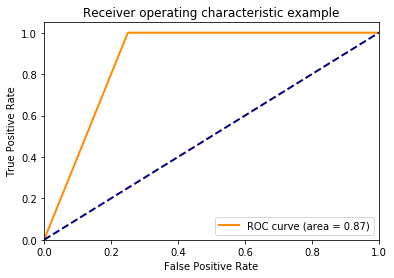

In [32]:
single_attribute_roc_curve(fprknc[1], tprknc[1], roc_aucknc[1])

In [ ]:
#####THIS IS WHERE YOU SHOULD STOP######
##STOP YOU HAVE GONE TOO FAR##

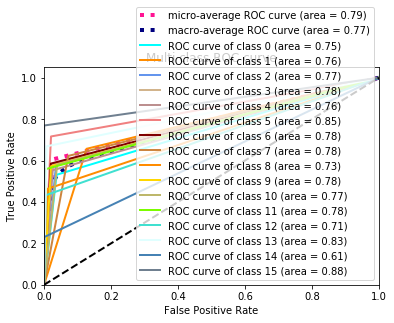

In [155]:
thedtc_list = y.unique().tolist()
ydtc_pred_labels = []
ydtc_test_labels = []
for pred in y1dtc_pred:
    l = [0] * 16
    l[thedtc_list.index(pred)] = 1
    ydtc_pred_labels.append(l)
    
for test in y_test:
    l = [0] * 16
    l[thedtc_list.index(test)] = 1
    ydtc_test_labels.append(l)

ydtc_pred_labels = np.array(ydtc_pred_labels)
ydtc_test_labels = np.array(ydtc_test_labels)
fprdtc, tprdtc, roc_aucdtc = roc_scores(ydtc_test_labels, ydtc_pred_labels,len(ydtc_pred_labels[0]))
full_attr_roc_curve(fprdtc, tprdtc, roc_aucdtc, ydtc_test_labels, ydtc_pred_labels, len(ydtc_pred_labels[0]))


In [157]:
thesvc_list = y.unique().tolist()
thesvc_list
# ysvc_pred_labels = []
# ysvc_test_labels = []
# for pred in y1svc_pred:
#     l = [0] * 16
#     l[thesvc_list.index(pred)] = 1
#     ysvc_pred_labels.append(l)
    
# for test in y_test:
#     l = [0] * 16
#     l[thesvc_list.index(test)] = 1
#     ysvc_test_labels.append(l)

# ysvc_pred_labels = np.array(ysvc_pred_labels)
# ysvc_test_labels = np.array(ysvc_test_labels)
# fprsvc, tprsvc, roc_aucsvc = roc_scores(ysvc_test_labels, ysvc_pred_labels,len(ysvc_pred_labels[0]))
# full_attr_roc_curve(fprsvc, tprsvc, roc_aucsvc, ysvc_test_labels, ysvc_pred_labels, len(ysvc_pred_labels[0]))

[22, 24, 23, 28, 1, 25, 17, 10, 15, 27, 26, 2, 19, 20, 29, 43]

In [55]:
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 4.5+ MB


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category_name             40949 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 4.5+ MB


In [74]:
Xr = iris.data
yr = iris.target

yr = label_binarize(yr, classes=[0, 1, 2])
n_classes = yr.shape[1]
yr

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.5, random_state=0)
yr

classifier = DecisionTreeClassifier()

yr_score = classifier.fit(Xr_train, yr_train).predict(Xr_test)
yr_score
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(yr_test[:, i], yr_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
#     print(roc_auc[i])
#     print(fpr[i])
#     print(tpr[i])

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

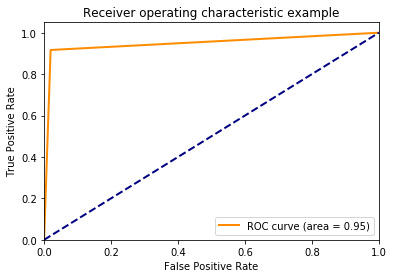

In [59]:
single_attribute_roc_curve(fpr[2], tpr[2], roc_auc[2])

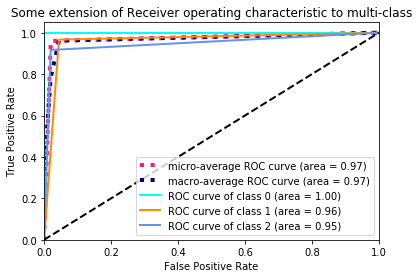

In [77]:
full_attr_roc_curve(fpr, tpr, roc_auc, y_test, y_score)

In [95]:
cdf = data["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
.to_frame() \
.reset_index() \
.rename(columns={"index": "year", "trending_date": "No_of_videos"})

In [96]:
cdf

,year,No_of_videos
0,2018,31349
1,2017,9600


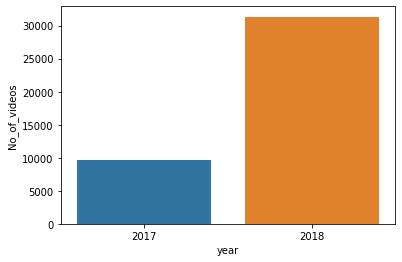

In [97]:
sns.barplot(x="year", y="No_of_videos", data=cdf)

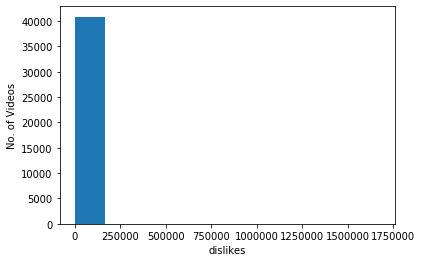

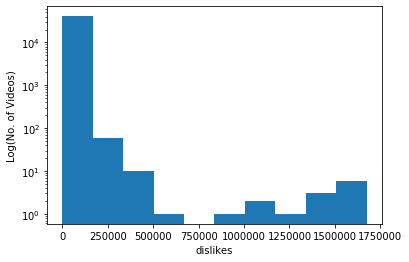

In [127]:
histogram_feature('dislikes')
histogram_log_feature('dislikes')

In [14]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [23]:
def bivariate_scatterplot(feature1, feature2):
    fig, ax = plt.subplots()
    plt.scatter(x=data[feature1], y=data[feature2], edgecolor="#000000", linewidths=0.5)
    ax.set(xlabel=feature1, ylabel=feature2)

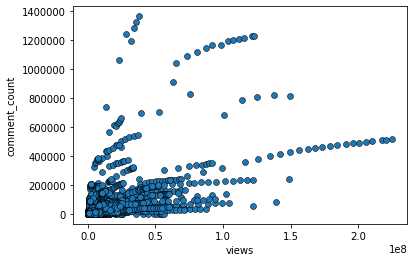

In [123]:
bivariate_scatterplot("views", "comment_count")

In [36]:
import json

with open("./US_category_id.json") as f:
    categories = json.load(f)['items']
    
categories

category_list = []
category_map = {}
for cat in categories:
    category_id = int(cat['id'])
    category_map[category_id] = cat['snippet']['title']

for cat in categories:
    category_id = int(cat['id'])
    category_list.append(category_id)

category_list

[1,
 2,
 10,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [27]:
data['category_name']

0              People & Blogs
1               Entertainment
2                      Comedy
3               Entertainment
4               Entertainment
5        Science & Technology
6               Entertainment
7        Science & Technology
8            Film & Animation
9             News & Politics
10                     Sports
11              Entertainment
12                      Music
13            News & Politics
14             Pets & Animals
15       Science & Technology
16                     Comedy
17                  Education
18       Science & Technology
19                  Education
20                  Education
21       Science & Technology
22                  Education
23              Howto & Style
24                     Comedy
25              Entertainment
26       Science & Technology
27              Howto & Style
28            News & Politics
29           Film & Animation
                 ...         
40919                  Gaming
40920                   Music
40921     

[Text(0, 0.5, 'No. of videos'), Text(0.5, 0, 'Category')]

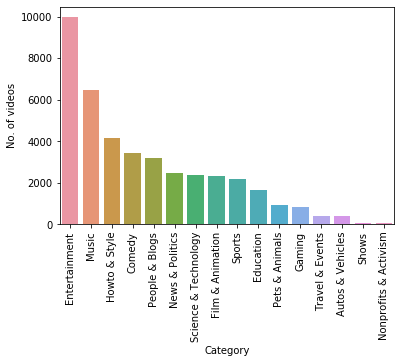

In [31]:
cdf = data["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
sns.barplot(x="category_name", y="No_of_videos", data=cdf, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of videos")

In [47]:
data.s

6455